# Imports 

In [19]:
import pandas as pd 
import numpy  as np

import matplotlib.pyplot as plt
import seaborn           as sns 

from sklearn.neighbors       import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing   import StandardScaler
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.svm             import SVC
from sklearn.ensemble        import RandomForestClassifier

# Loading Data

In [2]:
bank_df = pd.read_csv('bank-full.csv', sep=';')
print(bank_df.shape)

(45211, 17)


In [3]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank_df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
columns =  ['job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month', 'poutcome', 'y']
for column in columns:
    print(str(column) + ': ', bank_df[column].unique())
    print('')

job:  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

marital:  ['married' 'single' 'divorced']

education:  ['tertiary' 'secondary' 'unknown' 'primary']

default:  ['no' 'yes']

housing:  ['yes' 'no']

loan:  ['no' 'yes']

contact:  ['unknown' 'cellular' 'telephone']

month:  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

poutcome:  ['unknown' 'failure' 'other' 'success']

y:  ['no' 'yes']



# EDA

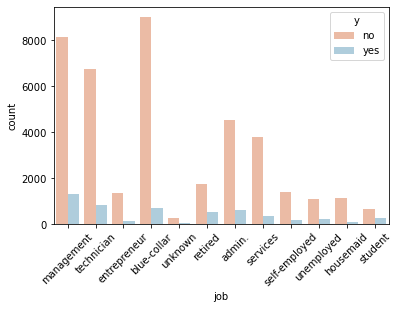

<Figure size 432x288 with 0 Axes>

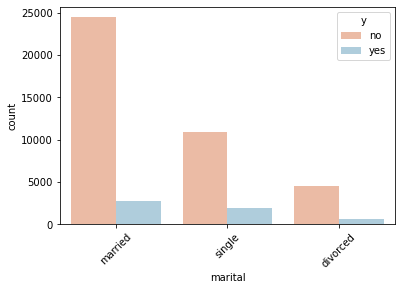

<Figure size 432x288 with 0 Axes>

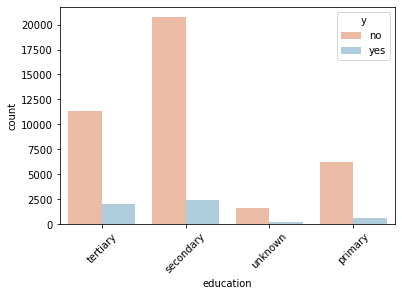

<Figure size 432x288 with 0 Axes>

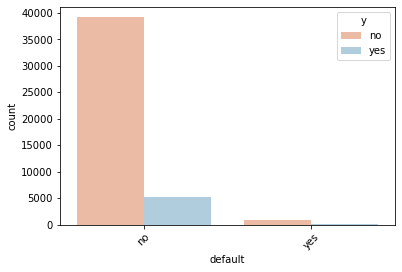

<Figure size 432x288 with 0 Axes>

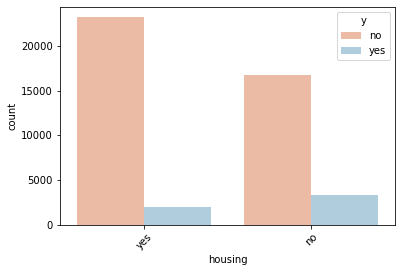

<Figure size 432x288 with 0 Axes>

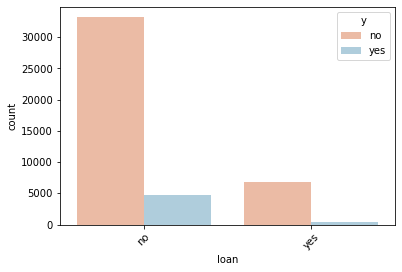

<Figure size 432x288 with 0 Axes>

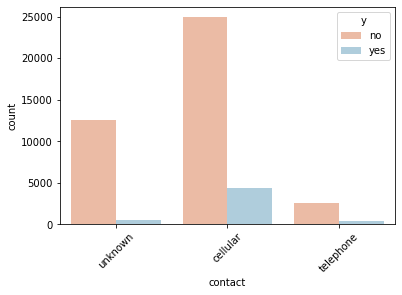

<Figure size 432x288 with 0 Axes>

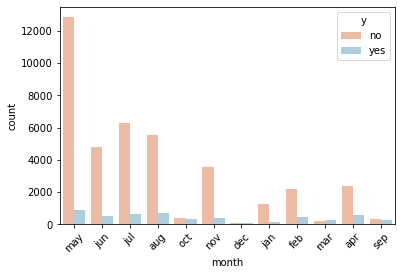

<Figure size 432x288 with 0 Axes>

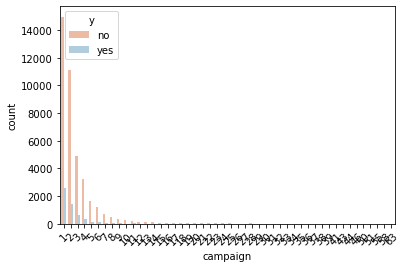

<Figure size 432x288 with 0 Axes>

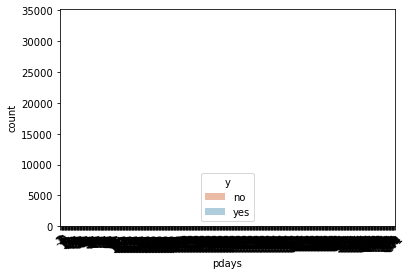

<Figure size 432x288 with 0 Axes>

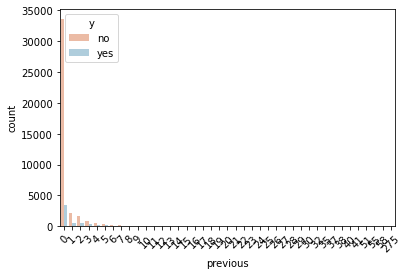

<Figure size 432x288 with 0 Axes>

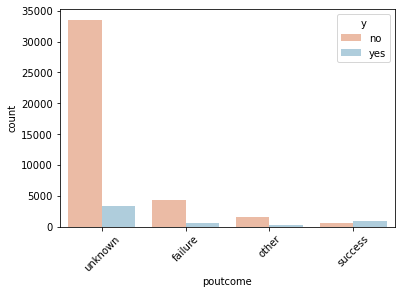

<Figure size 432x288 with 0 Axes>

In [4]:
num = ['age', 'balance', 'day','duration']
cat = ['job', 'marital', 'education', 'default', 'housing','loan', 'contact',  'month',  'campaign', 'pdays','previous', 'poutcome']

X_num = bank_df[num]
X_cat = bank_df[cat]
X = bank_df.iloc[:,:-1]
y = bank_df.iloc[:,-1]

# Plot the categorical features
for column in cat:
    plt.figure()
    sns.countplot(x=column, hue=y, data=bank_df, palette='RdBu')
    plt.xticks(rotation=45)
    plt.show()
    plt.clf()

# Data Preparation

In [6]:
# Create dummy variables 
print(bank_df.columns)
bank_df = pd.get_dummies(bank_df,drop_first=True)
print(bank_df.columns)

# Split Features and Target
X = bank_df.drop(['y_yes'], axis=1)
y = bank_df['y_yes']

# Standard Scaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, random_state=42)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_yes'],
      dtype='object')


# Model Training - KNeighbors Classifier

In [9]:
# KNeighbors Classifier
param_grid = {'n_neighbors': [*range(5,11)]}
knn = KNeighborsClassifier(n_neighbors=7)
clf = GridSearchCV(knn, param_grid, cv=5)
clf.fit(X_train,y_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

# Performance Metrics - KNeighbors Classifier

In [11]:
# Results
knn_pred = clf.predict(X_test)
print("Tuned KNeighbors Classifier Parameters: {}".format(clf.best_params_)) 
print("Best score is {}".format(clf.best_score_))
print()
print(confusion_matrix(y_test, knn_pred))
print()
print(classification_report(y_test, knn_pred))

Tuned KNeighbors Classifier Parameters: {'n_neighbors': 9}
Best score is 0.8937024010192058

[[11670   296]
 [ 1103   495]]

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11966
           1       0.63      0.31      0.41      1598

    accuracy                           0.90     13564
   macro avg       0.77      0.64      0.68     13564
weighted avg       0.88      0.90      0.88     13564



# Model Training - Logistic Regression

In [13]:
# Logistic Regression
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space,'penalty': ['l1','l2']}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train,y_train)
logreg_pred = logreg_cv.predict(X_test)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_se

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_se

# Performance Metrics - Logistic Regression

In [14]:
# Results
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))
print()
print(confusion_matrix(y_test, logreg_pred))
print()
print(classification_report(y_test, logreg_pred))

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213, 'penalty': 'l2'}
Best score is 0.9023920781916888

[[11659   307]
 [ 1051   547]]

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.64      0.34      0.45      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.88      0.90      0.89     13564



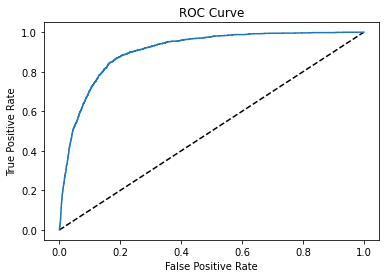

In [16]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [21]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]

# Cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg_cv,X_test,y_test,cv=5, scoring='roc_auc')

# AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# List of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_se

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_se

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_se

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_se

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_se

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_se

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_se

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_se

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_se

AUC: 0.9067624749054319
AUC scores computed using 5-fold cross-validation: [0.89039998 0.90794113 0.90085144 0.91351468 0.90834946]


# Model Training - Support Vector Machine

In [22]:
svm = SVC(kernel = 'rbf',gamma='scale')
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)

# Performance Metrics - Support Vector Machine

In [23]:
# Results
print("R2: {}".format(svm.score(X_test, y_test)))
print()
print(pd.crosstab(y_test, svm_pred))
print()
print(classification_report(y_test, svm_pred))

R2: 0.9049690356826895

col_0      0    1
y_yes            
0      11716  250
1       1039  559

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11966
           1       0.69      0.35      0.46      1598

    accuracy                           0.90     13564
   macro avg       0.80      0.66      0.71     13564
weighted avg       0.89      0.90      0.89     13564



# Model Training - Random Forest Classifier

In [26]:
# Hyperparameters to search
param_grid = {'max_depth': [5,10, 15], 'max_features': [5,10, 15], 'random_state': [42]}

# Find the best hyperparameters
rfr = RandomForestClassifier(n_estimators=200)
clf = GridSearchCV(rfr, param_grid, cv=5)
clf.fit(X_train, y_train)
randfor_pred = clf.predict(X_test)

print("Tuned Random Forest Regression Parameters: {}".format(clf.best_params_)) 
print("Best score is {}".format(clf.best_score_))

Tuned Random Forest Regression Parameters: {'max_depth': 10, 'max_features': 15, 'random_state': 42}
Best score is 0.9054572335224625


# Performance Metrics - Random Forest Classifier

In [27]:
# Results
print("R2: {}".format(logreg_cv.score(X_test, y_test)))
print()
print(pd.crosstab(y_test, randfor_pred))
print()
print(classification_report(y_test, randfor_pred))

R2: 0.8998820406959599

col_0      0    1
y_yes            
0      11631  335
1        979  619

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11966
           1       0.65      0.39      0.49      1598

    accuracy                           0.90     13564
   macro avg       0.79      0.68      0.72     13564
weighted avg       0.89      0.90      0.89     13564

